In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


#The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.

In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, BatchNormalization, Dropout

In [ ]:
#Generator ----> mini batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds =train_ds.map(process)
valid_ds = valid_ds.map(process)


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides =2 ,padding ='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides =2 ,padding ='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides =2 ,padding ='valid'))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs = 18 ,validation_data = valid_ds)

Epoch 1/18
625/625 [==============================] - 67s 107ms/step - loss: 0.0490 - accuracy: 0.9829 - val_loss: 0.9651 - val_accuracy: 0.8348
Epoch 2/18
625/625 [==============================] - 68s 109ms/step - loss: 0.0440 - accuracy: 0.9847 - val_loss: 1.1033 - val_accuracy: 0.8446
Epoch 3/18
625/625 [==============================] - 65s 104ms/step - loss: 0.0445 - accuracy: 0.9841 - val_loss: 2.0477 - val_accuracy: 0.7610
Epoch 4/18
625/625 [==============================] - 67s 106ms/step - loss: 0.0459 - accuracy: 0.9832 - val_loss: 1.0184 - val_accuracy: 0.8404
Epoch 5/18
625/625 [==============================] - 67s 107ms/step - loss: 0.0435 - accuracy: 0.9838 - val_loss: 1.3850 - val_accuracy: 0.8444
Epoch 6/18
625/625 [==============================] - 64s 102ms/step - loss: 0.0430 - accuracy: 0.9844 - val_loss: 1.1755 - val_accuracy: 0.8378
Epoch 7/18
625/625 [==============================] - 67s 107ms/step - loss: 0.0434 - accuracy: 0.9849 - val_loss: 1.1054 - val_ac

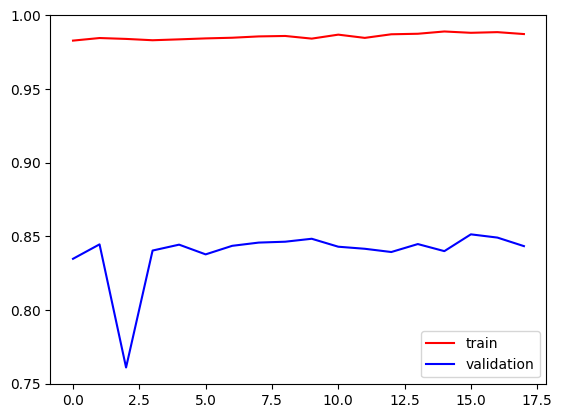

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label ='train')
plt.plot(history.history['val_accuracy'],color ='blue', label = 'validation')
plt.legend()
plt.show()

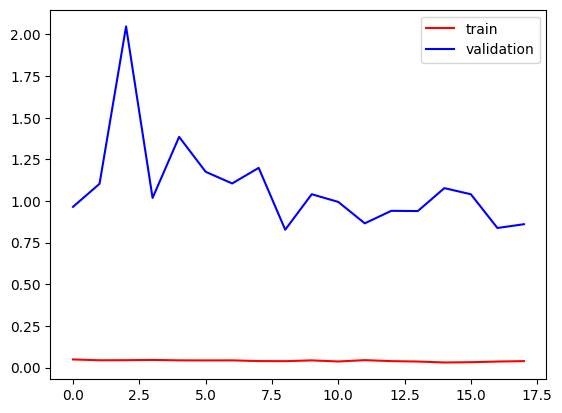

In [ ]:
plt.plot(history.history['loss'],color ='red',label ='train')
plt.plot(history.history['val_loss'],color ='blue', label = 'validation')
plt.legend()
plt.show()

###Ways to reduce overfitting

####Add more data
####Data augmentation
####L1/L2 Regularization
####DRopout
####Batch Norm
####Reduce Complaxity

(490, 399, 3)
AxesImage(size=(490, 399))
(256, 256, 3)


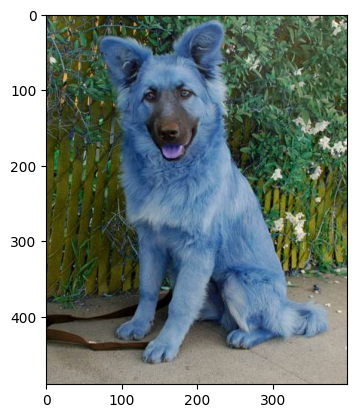

In [ ]:
import cv2
testImgPath = "/content/test/dogs/dog.10014.jpg"
testImg = cv2.imread(testImgPath)
print(testImg.shape)
print(plt.imshow(testImg))
testImg = cv2.resize(testImg, (256, 256))
print(testImg.shape)

# --- 1  means one image in this batch(1, 256,256 ,3)
# 256 , 256 , 3 means img size and chaneels in rgb

testInput =testImg.reshape(1, 256 , 256 ,3)


In [ ]:
model.predict(testInput)  #zero = cat and one = dog

1/1 [==============================] - 0s 292ms/step


array([[1.]], dtype=float32)